<a href="https://colab.research.google.com/github/RanojoyBiswas/Hotel-Booking-Analysis-EDA-/blob/main/Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Hotel Booking Analysis



### **Contributor**    - Ranajay Biswas
### **Project Type**    - EDA


## **Project Summary -**

In this project, we are going to perform exploratory data analysis on Hotel Booking data. We are given a data in csv format which has information about bookings of resorts and city hotels. The data contains many different variety of features and attributes. The data is from a wide demography covering multiple nations. This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

We are required to perform the right analysis on the data and come up with suggestions and insights that can be useful for the hotel business as well as helpful for the guests and families who are renting the hotel rooms.

We need to figure out which kind of metric to use, which kind of relationships are present in the features, where the businesses are lagging behind, which are the areas to improve etc.

## **GitHub Link -**

https://github.com/RanojoyBiswas/Hotel-Booking-Analysis-EDA-

## **Tableau Dashboard Link -**

https://public.tableau.com/app/profile/ranajay.biswas/viz/HotelBookingAnalysis-RanajayBiswas/Dashboard1?publish=yes

## **Problem Statement**


**Business Context**

Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions! This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. Explore and analyse the data to discover important factors that govern the bookings.

### **Business Objective :** 

* Understanding Guest patterns.
* Reduce number of cancellations.
* Find areas of potential growth.

## **Attributes :**

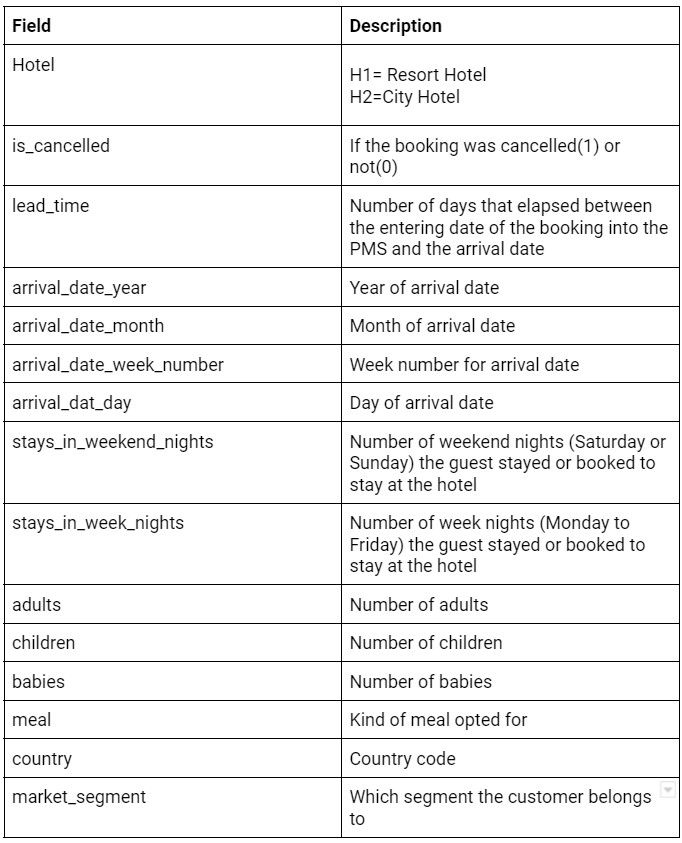



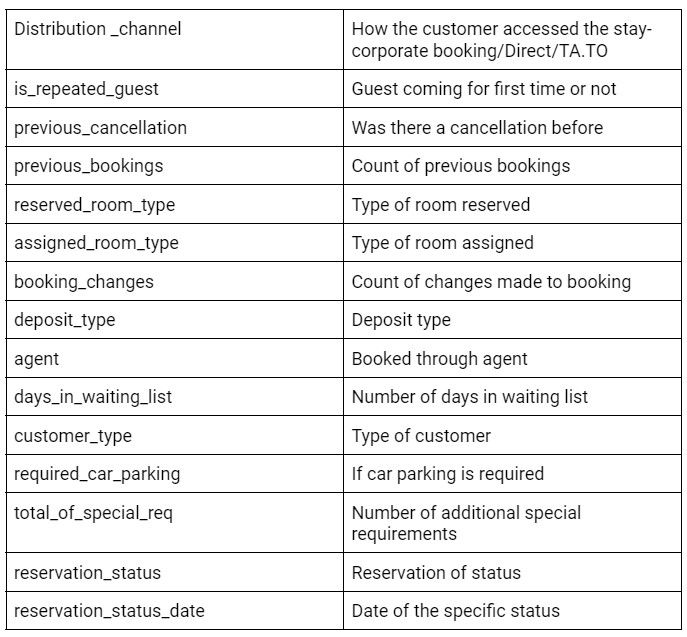

## **Data Collection & Summary:**

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import missingno as msno
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
sns.set(font_scale = 1.5)

In [ ]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# reading data set
dataset = pd.read_csv('/content/drive/MyDrive/EDA Projects/Ranajay Biswas - EDA on Hotel Booking Analysis/Hotel Bookings.csv',  encoding= 'unicode_escape')

In [ ]:
pd.set_option('display.max_columns', None)

Checking the data:

In [ ]:
# top 5 rows of the data
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# last 5 rows of the data
dataset.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
# checking the shape of our data
dataset.shape

(119390, 32)

In [ ]:
# checking columns
dataset.columns.tolist()

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [ ]:
# datatypes and null values overview
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### *Dataset has 119390 rows and 32 columns. And it contains object, integer and float data types*...

### <b>Descriptive Stats ---

In [ ]:
# descriptive statistics
dataset.describe(percentiles=[.1, .9])

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
10%,0.000000,3.000000,2015.000000,8.000000,4.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,40.000000,0.000000,50.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
90%,1.000000,265.000000,2017.000000,46.000000,28.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,241.000000,390.400000,0.000000,164.000000,0.000000,2.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## **Exploratory Data Analysis:**


Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations. 

### *Discovering the null values in the data* ---

In [ ]:
def missing_value_checker(dataframe):

  '''this function takes a dataframe as input and returns the count 
      and percentage of data that are misssing in each column'''

  # checking the number of null values
  number_missing = dataframe.isnull().sum()

  # checking the number of null values
  percent_missing = round(dataframe.isnull().sum() * 100 / len(dataframe), 2)

  # dataframe containing the count & percentage
  dat = pd.DataFrame(list(zip(list(dataframe.columns), number_missing, percent_missing)) , columns =['feature','observations_missing', 'percentage_missing']).set_index('feature')

  return dat

In [ ]:
#  dataframe containing the exact number and percentage of missing values for each column
missing = missing_value_checker(dataset)
missing.sort_values('observations_missing', ascending = False)

,observations_missing,percentage_missing
feature,,
company,112593,94.31
agent,16340,13.69
country,488,0.41
children,4,0.00
reserved_room_type,0,0.00
assigned_room_type,0,0.00
booking_changes,0,0.00
deposit_type,0,0.00
hotel,0,0.00


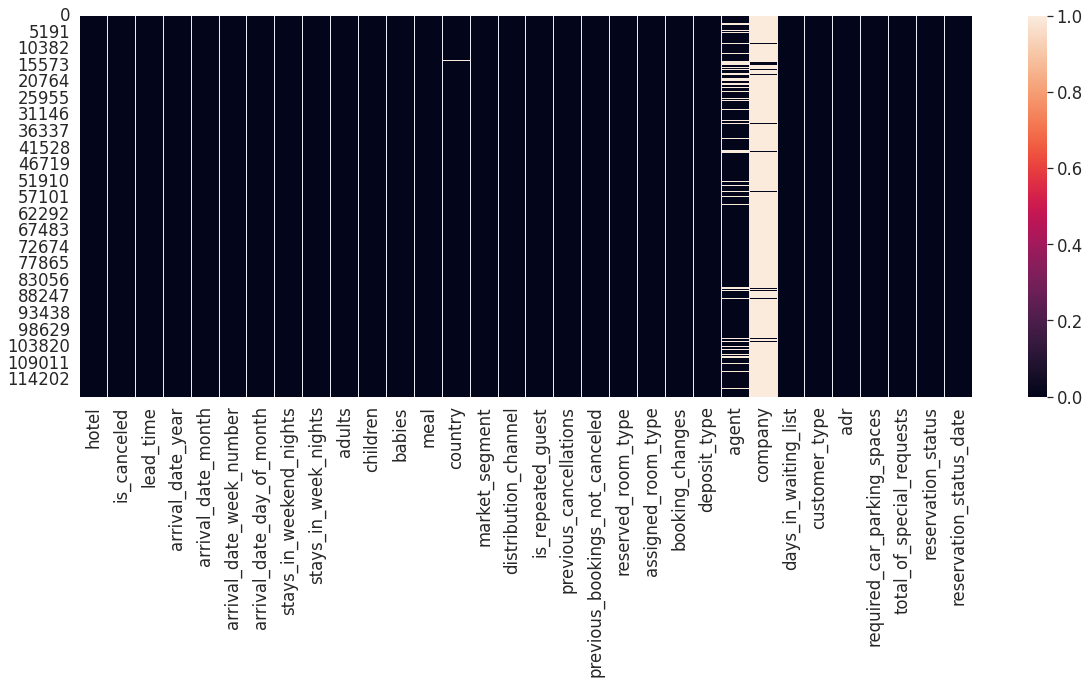

In [ ]:
# plotting for null values
plt.figure(figsize=(20,7))
sns.heatmap(dataset.isnull())

* Company column has more than 94% null values. We will have to drop this column from the data.

* Agent, Country and Children columns have missing values as well. But those numbers are low.

*Checking for duplicate values in the data..*

In [ ]:
# duplicate
len(dataset[dataset.duplicated()])

31994

In [ ]:
df = dataset.copy()

We have almost 32k duplicate observations.

In [ ]:
# dropping duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# after dropping duplicates
len(df[df.duplicated()])

0

Company column had more than 94% null values, so dropping that column.

In [ ]:
# dropping Company column
df.drop('company', axis = 1, inplace = True)

In [ ]:
#  dataframe containing the exact number and percentage of missing values for each column
missing = missing_value_checker(df)
missing.sort_values('observations_missing', ascending = False).head(5)

,observations_missing,percentage_missing
feature,,
agent,12193,13.95
country,452,0.52
children,4,0.00
hotel,0,0.00
previous_cancellations,0,0.00


### Null values Imputation :

Agent column :

In [ ]:
def dist_box_plot(label, dataset, size = (15,7)):

  ''' A function to plot the distribution 
  and histograms of binned data'''

  bins = "auto"
  x = np.array(df[label])
  sns.set(font_scale = 1.5)

  fig, ax = plt.subplots(1, 2, sharex=True, figsize=size, constrained_layout=True)
  sns.distplot(dataset[label],color="b", ax=ax[0])
  ax[0].set_title(f"Distribution of {label} column")

  ax[1] = sns.boxplot(data=dataset, x=label)

  ax[1].set_title(f'Boxplot for {label} column')
  # ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
  plt.show()

Checking distributions:

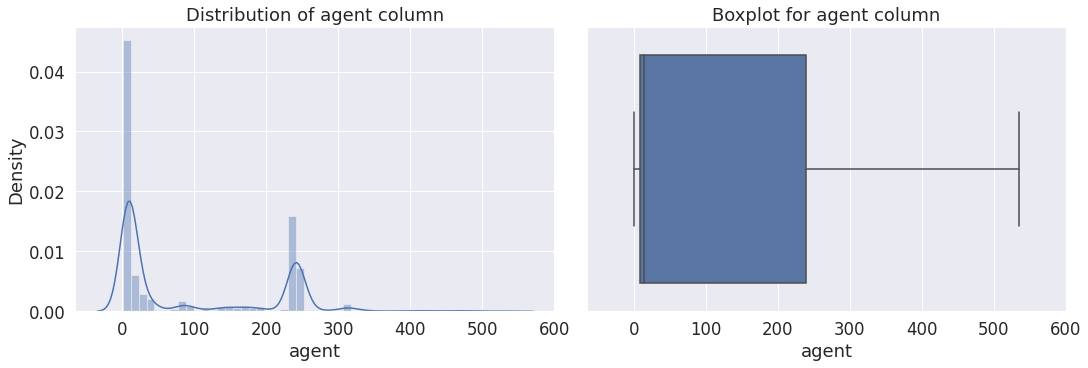

In [ ]:
dist_box_plot('agent', df, (15,5))

We have positive skewness. So, we will impute the missing values in this column with the median value.

In [ ]:
df['agent'].fillna(df['agent'].median(), inplace = True)

In [ ]:
df['agent'].isnull().sum()

0

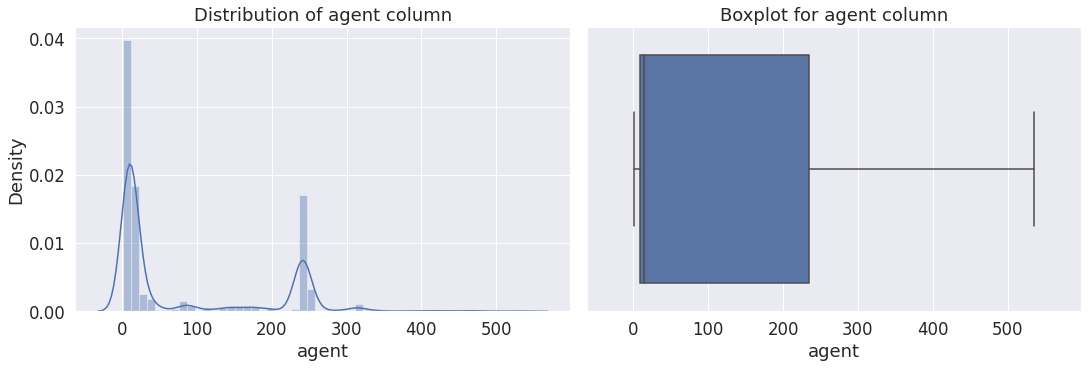

In [ ]:
dist_box_plot('agent', df, (15,5))

Applying Log transformation on Agent column:

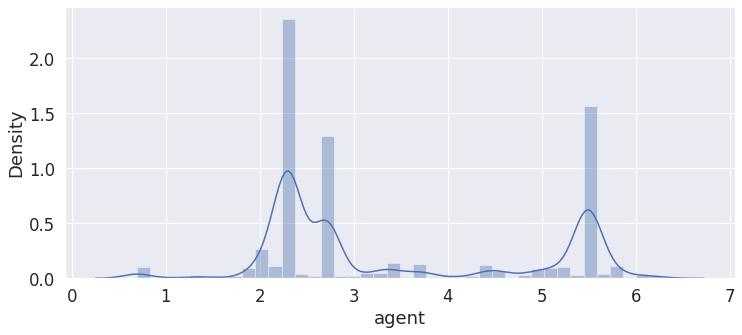

In [ ]:
plt.figure(figsize = (12,5))
sns.distplot(np.log1p(df['agent']),color="b")

### Country is object type. So, imputing the missing values with the 1st mode value

In [ ]:
df['country'].fillna(df['country'].mode()[0], inplace = True)

In [ ]:
df['country'].isnull().sum()

0

### For Children column --

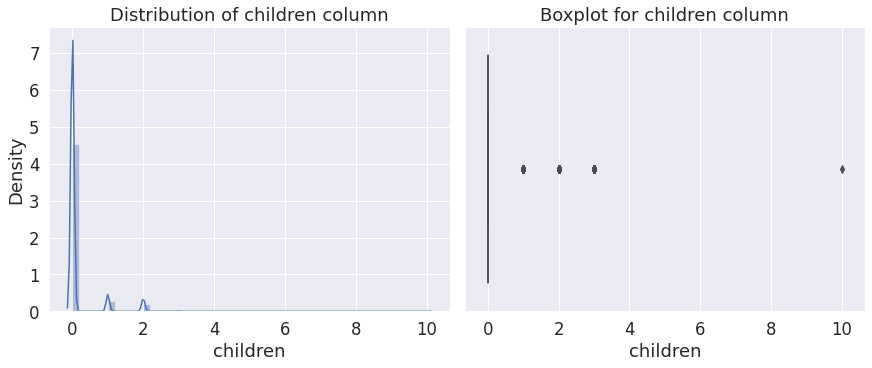

In [ ]:
dist_box_plot('children', df, (12,5))

Applying Log transformation on Children column:

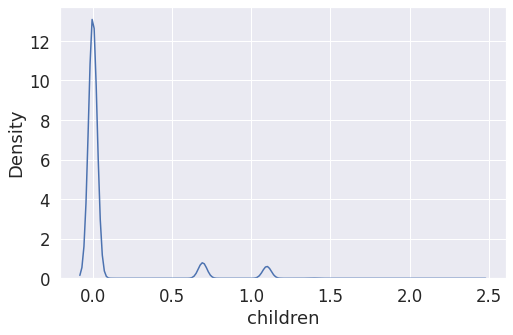

In [ ]:
plt.figure(figsize = (8,5))
sns.kdeplot(np.log1p(df['children']),color="b")

Children column has high right skewness. So, will be imputing the nulls with the median

In [ ]:
df['children'].fillna(df['children'].median(), inplace = True)

### Let's check if there are any null values now..

In [ ]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

Great, we do not any more null values.

In [ ]:
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01


### Let's check if there are any entries where total number of guests are 0. Meaning that adults, children and babies add up to 0. If there's such row, then it would be an invalid observation.

In [ ]:
df[(df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0)][['adults', 'children', 'babies']]

,adults,children,babies
2224,0,0.0,0
2409,0,0.0,0
3181,0,0.0,0
3684,0,0.0,0
3708,0,0.0,0
...,...,...,...
115029,0,0.0,0
115091,0,0.0,0
116251,0,0.0,0
116534,0,0.0,0


As we can see there are 166 such invalid observations. We will need to to get rid of these.

In [ ]:
delete = (df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0)

# keeping only those rows which are valid
df = df[~delete]

In [ ]:
# saving the data
df.to_csv('clean_hb_data.csv')

In [ ]:
# from google.colab import files
# files.download('clean_hb_data.csv')

## **Let's start with some visualizations :**

### First, let's check the distribution of the 'is_canceled' column, which indicates whether a booking was canceled or not, using a bar plot.

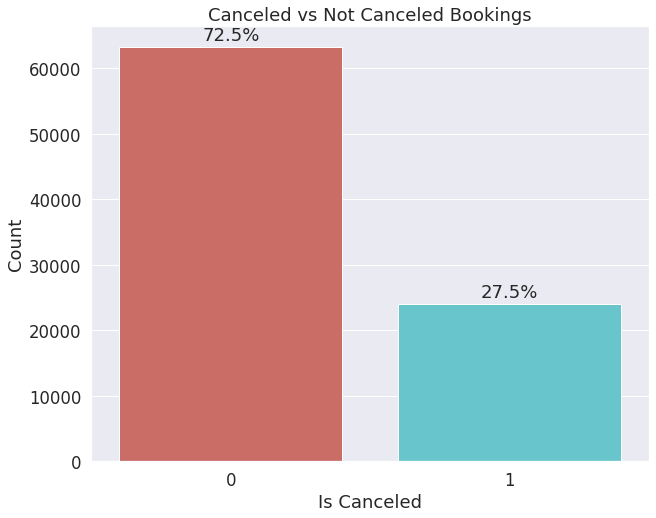

In [ ]:
# Count the number of canceled and not canceled bookings
cancel_counts = df['is_canceled'].value_counts()

# Calculate the percentage of each category
cancel_perc = cancel_counts / cancel_counts.sum() * 100

# Plot the countplot
plt.figure(figsize=(10,8))
ax = sns.countplot(x='is_canceled', data=df, palette = 'hls')

# Add text labels for the percentage of each category
for i in range(cancel_counts.shape[0]):
    count = cancel_counts[i]
    perc = cancel_perc[i]
    ax.text(i, count+1000, f'{perc:.1f}%', ha='center')
    
# Set the plot title and labels
ax.set_title('Canceled vs Not Canceled Bookings')
ax.set_xlabel('Is Canceled')
ax.set_ylabel('Count')
    
# Show the plot
plt.show()

The countplot gives us the idea about the total count of canceled and not-canceled Hotel bookings.

* From the plot, we can see that about 72.5% of the bookings were not canceled, while 27.5% were canceled.

### Next, let's check the distribution of the 'hotel' column, which indicates the type of hotel, using a bar plot.

In [ ]:
df['hotel'].value_counts()

City Hotel      53274
Resort Hotel    33956
Name: hotel, dtype: int64

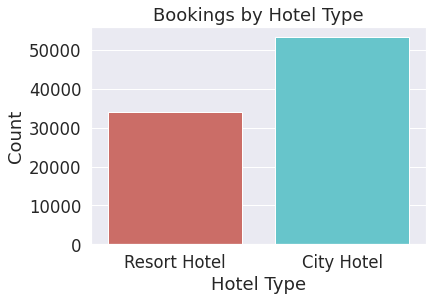

In [ ]:
# Plot the countplot
ax = sns.countplot(x='hotel', data=df, palette = 'hls')

# Set the plot title and labels
ax.set_title('Bookings by Hotel Type')
ax.set_xlabel('Hotel Type')
ax.set_ylabel('Count')
    
# Show the plot
plt.show()

This bar plot gives us a the right idea of how many resorts and city hotels we have in our data.

* From the plot, we can see that most of the bookings are for City hotels.

### let's check the distribution of the 'arrival_date_month' column, which indicates the month of arrival, using a bar plot.

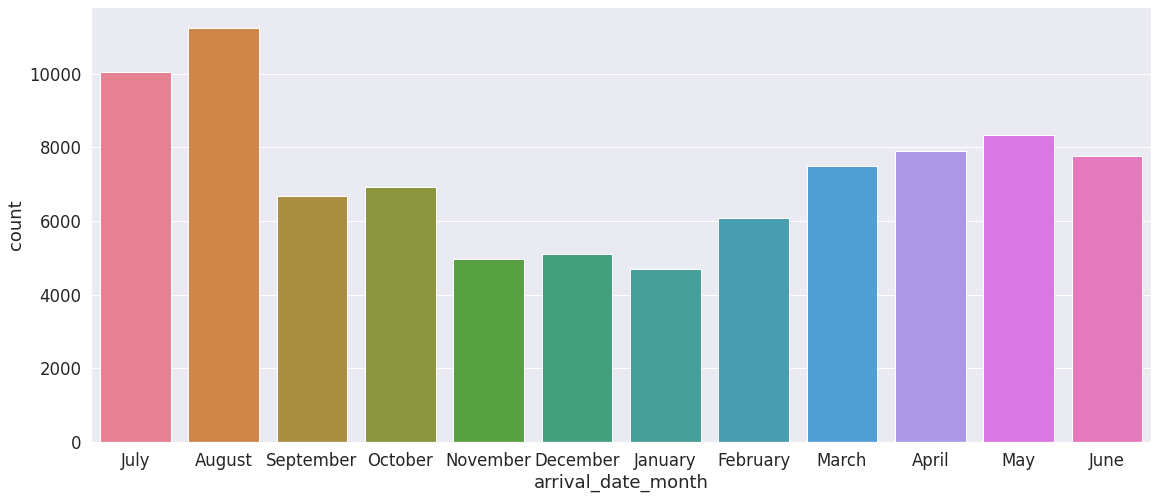

In [ ]:
plt.figure(figsize = (19,8))
sns.countplot(x='arrival_date_month', data=df, palette = 'husl')

From the plot, 

* we can see that most of the bookings are for the summer months (June, July, and August).

* November, December and January have the lowest bookings.

### Checking the distribution of the market_segment column, which indicates the type of market segment.

In [ ]:
# plt.figure(figsize = (15,7))
# g = sns.countplot(df['market_segment'], palette = "tab10")
# g.set_xticklabels([i for i in df['market_segment'].value_counts().index])
# for p in g.patches:
#   g.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
# plt.show()

In [ ]:
df['market_segment'].value_counts()

Online TA        51553
Offline TA/TO    13855
Direct           11780
Groups            4922
Corporate         4200
Complementary      692
Aviation           226
Undefined            2
Name: market_segment, dtype: int64

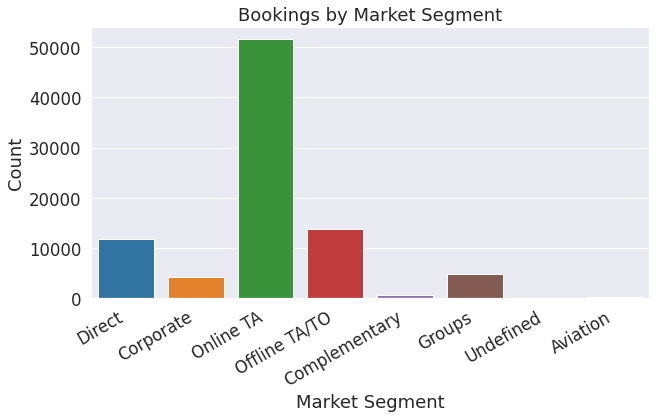

In [ ]:
plt.figure(figsize = (10,5))
ax = sns.countplot(df['market_segment'], palette = "tab10")

# Set the plot title and labels
ax.set_title('Bookings by Market Segment')
ax.set_xlabel('Market Segment')
ax.set_ylabel('Count')

# Set the x-axis tick labels and rotate them
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

# Show the plot
plt.show()

From the plot, 
* we can see that most of the bookings are for the Online Travel Agents market segment.
* for Aviation, we have the least booking.

### Now, let's check the relationship between the 'is_canceled' and 'lead_time' columns, which indicates the number of days between the booking date and the arrival date. We will be using a box plot.

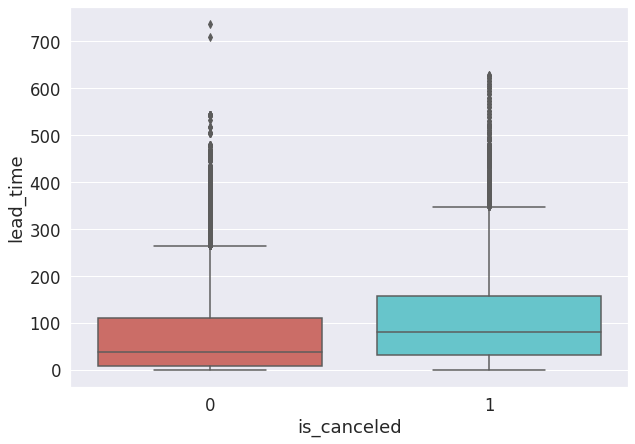

In [ ]:
plt.figure(figsize = (10,7))
sns.boxplot(x='is_canceled', y='lead_time', data=df, palette = 'hls')

From the plot, we can see that the lead time is higher for canceled bookings compared to non-canceled bookings.

### Average Daily Rates vs Cancelation ---

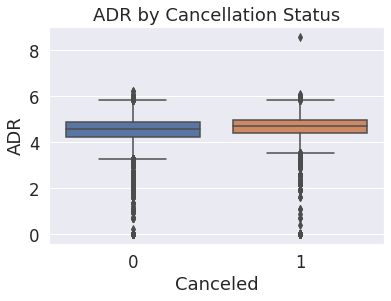

In [ ]:
ax = sns.boxplot(x='is_canceled', y=np.log1p(df['adr']), data=df)

# Add labels and title
plt.xlabel('Canceled')
plt.ylabel('ADR')
plt.title('ADR by Cancellation Status')

# Show the plot
plt.show()

* No obvious connection is visible between Daily Rate and Cancelation.

### What was the most assigned room type?

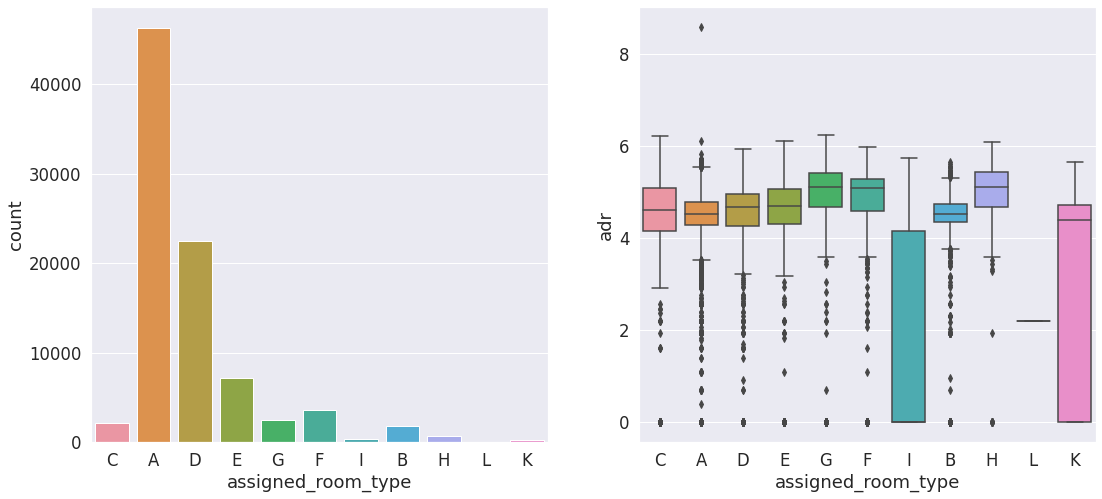

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

grp_by_room = df.groupby('assigned_room_type')
df['Num_of_bookings'] = grp_by_room.size()

sns.countplot(ax = axes[0], x = df['assigned_room_type'])
sns.boxplot(ax = axes[1], x = df['assigned_room_type'], y = np.log1p(df['adr']))
plt.show()

* Room type **A** and **D** were assigned the more than 60% of the times to guests.
* Except for Room type **I** and **K**, all other rooms have simjilar kind of average daily rate.

### let's check the relationship between the is_canceled and country columns, which indicates the country of origin.

In [ ]:
# Group the data by country and cancellation status, and count the number of bookings
country_cancellation_counts = df.groupby(['country', 'is_canceled'])['hotel'].count()

# Convert the resulting Series to a DataFrame and reset the index
country_cancellation_counts = country_cancellation_counts.to_frame(name='count').reset_index()

# Pivot the data to create separate columns for cancellations and non-cancellations
country_counts = country_cancellation_counts.pivot(index='country', columns='is_canceled', values='count')

# Rename the columns to be more descriptive
country_counts.columns = ['not_canceled', 'canceled']

# Fill any missing values with 0 (for countries with no cancellations or non-cancellations)
country_counts = country_counts.fillna(0)

# Convert float values to integers
country_counts = country_counts.astype(int)

# Sort the DataFrame by the total number of bookings (cancellations + non-cancellations) in descending order
country_counts = country_counts.assign(total=country_counts.sum(axis=1)).sort_values('total', ascending=False)

# Print the top 10 countries with the most cancellations and non-cancellations
print(country_counts.head(10))

         not_canceled  canceled  total
country                               
PRT             17991      9811  27802
GBR              8440      1984  10424
FRA              7091      1732   8823
ESP              5382      1862   7244
DEU              4332      1053   5385
ITA              1986      1075   3061
IRL              2347       668   3015
BEL              1670       411   2081
BRA              1266       727   1993
NLD              1560       350   1910


Let's Visualize it using a map ---

In [ ]:
# Get the number of guests from each country
guests_by_country = df['country'].value_counts()

# Load the GeoJSON file for world countries
# geojson = px.data.gapminder().query("year==2007").query("continent=='Europe'").reset_index().to_json()

# Create the map chart
fig = px.choropleth(guests_by_country, 
                    locations=guests_by_country.index, 
                    color=guests_by_country.values,
                    color_continuous_scale='YlOrRd', 
                    hover_name=guests_by_country.index, 
                    title = 'Home Country of Guests',
                    height=500, width=800)

# Show the chart
fig.show()

Top 10 countries using a count plot --->

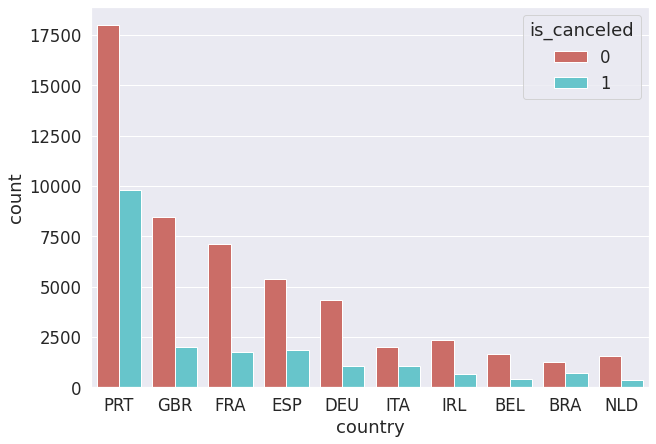

In [ ]:
# top 10 countries
plt.figure(figsize = (10,7))
sns.countplot(x='country', hue='is_canceled', data=df, order=df['country'].value_counts().iloc[:10].index, palette = 'hls')

From the plot, 
* we can see that most of the bookings are from Portugal, followed by the United Kingdom and France. We can also see that the cancellation rate varies widely across different countries.

### Checking the relationship between booking Cancelation and if the guest is a repeated guest or not.

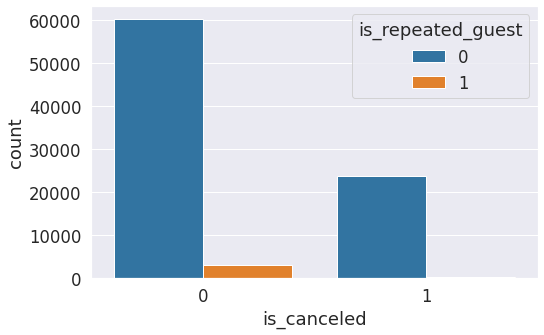

In [ ]:
plt.figure(figsize = (8,5))
sns.countplot(x='is_canceled', hue = 'is_repeated_guest', data=df, palette = 'tab10')

This bar plot tells us how many repeated guests and new guests we have in our data.

* We have 2x more new guests compared to the repeating guests. 
* The booking cancelation number is also higher for the new guests as well.

### Distribution Channel wise Analysis

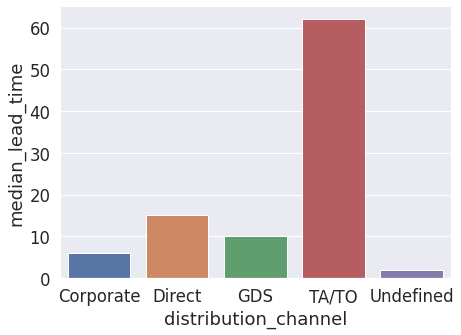

In [ ]:
group_by_dc = df.groupby('distribution_channel')
d2 = pd.DataFrame(round(group_by_dc['lead_time'].median(),2)).reset_index().rename(columns = {'lead_time': 'median_lead_time'})
plt.figure(figsize = (7,5))
sns.barplot(x = d2['distribution_channel'], y = d2['median_lead_time'])
plt.show()

* TA/TO is mostly used for planning Hotel visits ahead of time. But for sudden visits other mediums are most preferred.

### Checking what kinds of meals are there in Resorts and City hotels using a bar plot ---

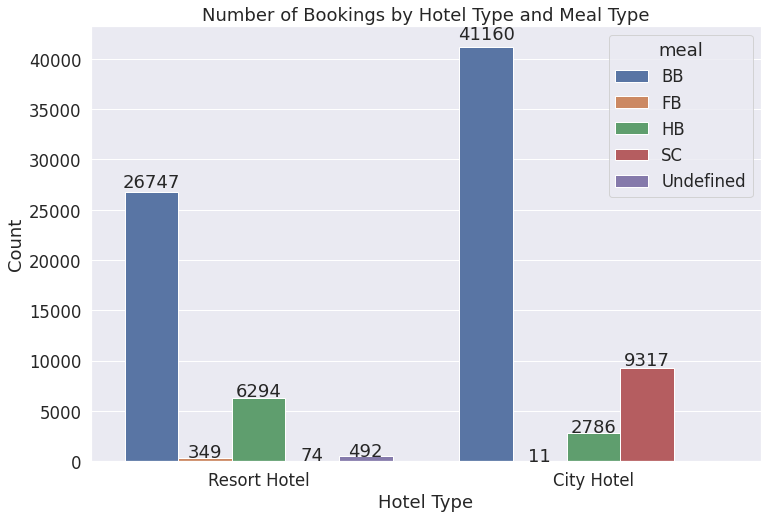

In [ ]:
# Create the plot
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='hotel', hue='meal', data=df)

# Add labels and title
plt.xlabel('Hotel Type')
plt.ylabel('Count')
plt.title('Number of Bookings by Hotel Type and Meal Type')

# Add total numbers for each bar
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy()
    # ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    ax.annotate('{:.0f}'.format(height), (x + width/2, y + height*1.02), ha='center')

    
# Show the plot
plt.show()

* We have most number of **BB: Bed & Breakfast** in the meal type for City hotels and Resorts.
* For Resorts' **HB** is the 2nd most popular. HB means Half Board. It includes bed, breakfast and evening meal.

### Let's check what kind of relationship meal type has with booking cancellation ---

In [ ]:
fig = px.histogram(df, x='meal', color='is_canceled', barmode='stack', facet_col='hotel', category_orders={'meal': ['SC', 'BB', 'HB', 'FB'], 'is_canceled': [0, 1]}, 
                   labels={'meal': 'Meal Type', 'is_canceled': 'Cancellation Status'}, height=500, width=1000)

fig.update_xaxes(tickangle=45)
fig.show()

* Most bookings and cancelations, both are for hotels with meal type - **'BB'**

### Average Daily rates for City and Resort hotels throught the whole year.

In [ ]:
# Create a dataframe for city hotels
city_hotel = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]

# Create a dataframe for resorts
resort_hotel = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]

In [ ]:
# taking mean of adr and grouping by months
resort = resort_hotel.groupby('arrival_date_month')['adr'].mean().reset_index()

city = city_hotel.groupby('arrival_date_month')['adr'].mean().reset_index()

In [ ]:
# Merge the two dataframes on 'arrival_date_month'
merged_df = pd.merge(city, resort, on='arrival_date_month')

# Rename the columns to be more descriptive
merged_df.columns = ['month', 'price_for_city_hotel', 'price_for_resort']

In [ ]:
merged_df

,month,price_for_city_hotel,price_for_resort
0,April,114.251636,76.841664
1,August,122.825388,182.103524
2,December,90.769559,64.072826
3,February,88.210810,53.624311
4,January,83.378062,48.599615
5,July,120.069489,150.914540
6,June,120.673753,109.026942
7,March,91.306933,57.110018
8,May,124.825944,77.725129
9,November,88.271089,48.956548


In [ ]:
# line chart of Average price rates
px.line(merged_df, x = 'month', y = ['price_for_city_hotel', 'price_for_resort'], title = 'Room Prices per night Over the Months', height=500, width=1200)

The line chart tells us about the up & down trend in average daily price for City hotels and Resorts.

* Prices of resorts' are highest in the month of August, followed by July.
* City hotels charge the most on May-July.
* From November-January, the resort prices are lowest.

### Checking the Daily Rates of rooms based on Rooms Types for City hotels and Resorts ---

In [ ]:
# Create a new DataFrame with only the necessary columns
df_adr = df.loc[df['is_canceled'] == 0, ['hotel', 'adr', 'reserved_room_type']]

# Group the data by hotel type and room type, and calculate the mean ADR
df_adr_mean = df_adr.groupby(['hotel', 'reserved_room_type'])['adr'].mean().reset_index()

# Create the plot
fig = px.bar(df_adr_mean, x='reserved_room_type', y='adr', color='hotel',
             labels={'reserved_room_type': 'Room Type', 'adr': 'ADR (Average Daily Rate)', 'hotel': 'Hotel Type'},
             title='ADR by Room Type and Hotel Type',
             height=500, width=1000)

# Show the plot
fig.show()

This stacked bar chart gives us the idea of how prices vary for different room types.

* Resorts charge the most daily for **H** type rooms.
* City hotels charge the most for **G** type rooms.

### Understanding the relationship of Total Stay of guests in Resorts and City hotels based on Average Daily Rate.

In [ ]:
# Create a new column for total_stay by adding stays_in_weekend_nights and stays_in_week_nights
df['total_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Group the data by hotel type and calculate the mean of adr and total_stay for each group
grouped_df = df.groupby(['hotel', 'total_stay']).agg({'adr': 'mean'}).reset_index()

# Plot a scatter plot of total_stay vs adr with hue on hotel type
fig = px.scatter(grouped_df, x='total_stay', y='adr', color='hotel')

# Set the axis labels and title
fig.update_layout(xaxis_title='Total Stay', yaxis_title='Average Daily Rate', 
                  title='ADR by Total Stay and Hotel Type',
                  height=500, width=900)

# Show the plot
fig.show()

We get the total stay by adding the number of nights people stayed in weekends and weekdays.

From the scatter plot,
* We see most people stayed between 0-30 days for both resorts and city hotels, where the ADR ranges from 80-120 euros.

### Correlations of different variables.

In [ ]:
# Correlation Heatmap visualization code
corr = df.corr()

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '100px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_stay
is_canceled,1.00,0.18,0.09,0.00,0.01,0.06,0.08,0.08,0.07,-0.02,-0.09,0.05,-0.05,-0.09,-0.01,0.00,0.13,-0.18,-0.12,0.09
lead_time,0.18,1.00,0.14,0.10,0.01,0.24,0.31,0.14,0.03,-0.00,-0.15,0.01,-0.08,0.08,0.07,0.13,0.02,-0.09,0.03,0.32
arrival_date_year,0.09,0.14,1.00,-0.51,-0.01,0.01,0.00,0.04,0.04,-0.02,0.02,-0.05,0.03,0.01,-0.00,-0.03,0.18,-0.04,0.06,0.00
arrival_date_week_number,0.00,0.10,-0.51,1.00,0.09,0.03,0.03,0.03,0.01,0.01,-0.04,0.01,-0.02,0.01,0.02,0.01,0.10,0.01,0.05,0.03
arrival_date_day_of_month,0.01,0.01,-0.01,0.09,1.00,-0.02,-0.03,-0.00,0.02,-0.00,-0.00,-0.01,0.00,0.01,0.01,0.01,0.02,0.01,-0.00,-0.03
stays_in_weekend_nights,0.06,0.24,0.01,0.03,-0.02,1.00,0.55,0.09,0.03,0.01,-0.11,-0.02,-0.06,0.03,0.15,-0.03,0.04,-0.04,0.03,0.78
stays_in_week_nights,0.08,0.31,0.00,0.03,-0.03,0.55,1.00,0.10,0.03,0.02,-0.11,-0.02,-0.06,0.07,0.19,0.00,0.06,-0.04,0.04,0.95
adults,0.08,0.14,0.04,0.03,-0.00,0.09,0.10,1.00,0.02,0.02,-0.17,-0.04,-0.12,-0.04,0.02,-0.01,0.24,0.01,0.11,0.11
children,0.07,0.03,0.04,0.01,0.02,0.03,0.03,0.02,1.00,0.02,-0.05,-0.02,-0.03,0.03,0.04,-0.02,0.33,0.04,0.04,0.03
babies,-0.02,-0.00,-0.02,0.01,-0.00,0.01,0.02,0.02,0.02,1.00,-0.01,-0.01,-0.01,0.08,0.03,-0.01,0.02,0.03,0.09,0.02


A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, i used correlation heatmap.

From the plot, 
* We can see that 'stays_in_week_nights' has a high correlation of 0.55 with stays_in_weekend_nights.
* For Repeated guests, there is a high chance of previous booking was not canceled.
* Average Daily Rate has a correlation of 0.24 with Adults and 0.33 with Children.

## **Solutions to Business Objective**

* From December - January, the number of bookings are low. In order to attarct more guests, better prices should be offered.
* Half Board and Full Board meal types are underperforming. So, we need to look out for opportunities for improving guest experiences for those.
* We can target those guests more who are staying with the hotels for longer period of times.
* We get more cancelations when the lead time is higher. So, we need to find strategies to reduce this metric.
* Returning guests have a lower chance of canceling a booking, so we should reward them with discounts and offers to secure more future bookings in our hotels.
* Stay competitive.
* Ask for feedback often.
* Periodically throw Offers to retain customers.

# **Conclusion**

* More guests are booking hotels in summer months (June, July, and August). Whereas,
November, December and January have the lowest bookings.
* Most people book through Online Travel Agents market segment.
for Aviation, there is least booking.
* TA/TO distribution channel is mostly used for planning Hotel visits ahead of time.
* Higher lead_time leads to more cancelations.
* Returning guests tend to cancel less often.
* Room type A and D were assigned the more than 60% of the times to guests.
* There is no obvius connection between booking cancelation and average daily rate.
